In [1]:
from sklearn.cluster import KMeans # KMeans 라이브러리 불러오기
import numpy as np
import pandas as pd
import math
import seaborn as sb # 데이터 시각화를 위한 seaborn
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib
import scipy as sp
from scipy.spatial import distance
sb.set_palette("Set2")

In [2]:
data = pd.read_csv("C:/Users/kt826/Desktop/kmeansclustering1.csv")
data

,food_name,kal,0,1,2,3,4,5,6,7,...,176,177,178,179,180,181,182,183,184,185
0,감자미음,40.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,고구마미음,47.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,브로콜리미음,39.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,사과미음,47.46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,쌀미음,52.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,사과치즈진밥,168.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,명태당근진밥,140.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,감자사과메시,57.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,달걀노른자죽,137.40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
data1 = data.iloc[:,1:]
data1

,kal,0,1,2,3,4,5,6,7,8,...,176,177,178,179,180,181,182,183,184,185
0,40.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,168.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,140.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,57.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,137.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


C:\Users\kt826\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


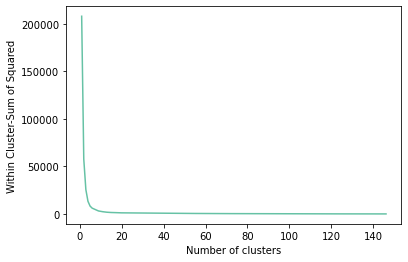

In [4]:
# Elbow method 
wcss = []
for i in range(1,147):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,147),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

In [21]:
# 중심점(Centroid) 구하기
centroids = data1.sample(5,random_state=1)
centroids

,kal,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,cluster
100,113.35,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,39.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54,131.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
104,127.80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
99,117.25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [22]:
# 형변환
final_data = data1.astype(float)
final_centroids = centroids.astype(float)

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(data1,centroids,"euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = data1
result["cluster"] = np.array(cluster_num)
result

,kal,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,cluster
0,40.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,47.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47.46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,52.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,168.30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
144,140.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
145,57.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146,137.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


In [29]:
result.groupby('cluster').count()

,kal,0,1,2,3,4,5,6,7,8,...,176,177,178,179,180,181,182,183,184,185
cluster,,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
1,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
2,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
3,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [30]:
result.groupby('cluster').mean()

,kal,0,1,2,3,4,5,6,7,8,...,176,177,178,179,180,181,182,183,184,185
cluster,,,,,,,,,,,,,,,,,,,,,
0,96.023556,0.044444,0.000000,0.000000,0.000000,0.022222,0.000,0.000000,0.000000,0.111111,...,0.022222,0.000000,0.022222,0.000000,0.022222,0.044444,0.088889,0.000000,0.000000,0.022222
1,55.486667,0.041667,0.000000,0.020833,0.000000,0.041667,0.000,0.000000,0.020833,0.020833,...,0.000000,0.000000,0.000000,0.041667,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000
2,148.925429,0.085714,0.057143,0.000000,0.000000,0.000000,0.000,0.028571,0.000000,0.085714,...,0.000000,0.028571,0.000000,0.000000,0.000000,0.257143,0.028571,0.000000,0.057143,0.000000
3,127.356250,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.000000,0.000000,0.000000,0.000000
4,118.541667,0.000000,0.000000,0.000000,0.083333,0.083333,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000


# 차원축소기법

In [31]:
# 차원축소기법
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data1)
pca_result = pca.transform(data1)
pca_result

array([[-5.86050508e+01,  2.69235901e-01],
       [-5.13052127e+01,  1.26985109e-01],
       [-5.99040951e+01,  1.84206276e-01],
       [-5.14461161e+01,  1.14340184e-01],
       [-4.67045616e+01,  5.77443003e-03],
       [-5.14437742e+01,  7.11944476e-02],
       [-1.31944895e+00, -1.51881889e+00],
       [-4.97064638e+01,  6.99194019e-02],
       [-1.29171144e+01, -3.79498873e-01],
       [-4.61573121e+01,  3.18825385e-02],
       [ 3.28114579e+00, -1.64525805e+00],
       [-5.27950993e+01,  9.27695302e-02],
       [-4.65075466e+01,  3.04614903e-02],
       [-4.68054737e+01,  8.75940524e-02],
       [-5.48068265e+01,  1.28995438e-01],
       [-5.94264577e+01,  1.77733652e-01],
       [-5.06044272e+01,  7.75512180e-03],
       [-5.24960229e+01,  1.03638609e-01],
       [-4.58576625e+01,  2.44908690e-02],
       [-5.24942709e+01,  9.16040474e-02],
       [-5.57940103e+01,  1.46126764e-01],
       [-5.50446477e+01,  9.93591810e-02],
       [-2.44152529e+01,  8.93449863e-01],
       [-1.

In [32]:
# 데이터프레임으로 만들기
pca_df = pd.DataFrame(pca_result)
pca_df['cluster'] = data1['cluster']
pca_df.head()

,0,1,cluster
0,-58.605051,0.269236,1
1,-51.305213,0.126985,1
2,-59.904095,0.184206,1
3,-51.446116,0.114340,1
4,-46.704562,0.005774,1


C:\Users\kt826\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


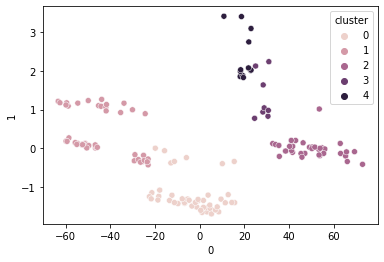

In [36]:
axs = plt.subplots()
axs = sb.scatterplot(0,1,hue='cluster',data=pca_df)